### HR-Analytics, for which employee should be promoted:

In [1]:
# This is the Binary Class Classification problem.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
train= pd.read_csv('train (1).csv')
test= pd.read_csv('test (1).csv')

In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met..80', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
len(train.columns)

14

In [8]:
len(test.columns)

13

In [9]:
train.shape

(54808, 14)

In [10]:
test.shape

(23490, 13)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met..80          54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
# Plotting the categorical variables: Education, Department, Region, Gender, Recruitment Channel

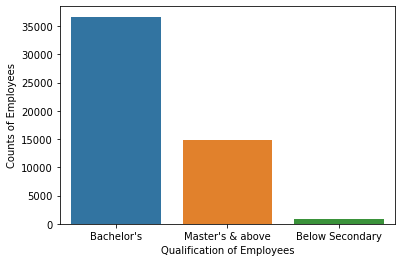

In [13]:
sns.barplot(train['education'].value_counts().keys().tolist(),train['education'].value_counts().tolist())
plt.xlabel("Qualification of Employees")
plt.ylabel('Counts of Employees')
plt.show()

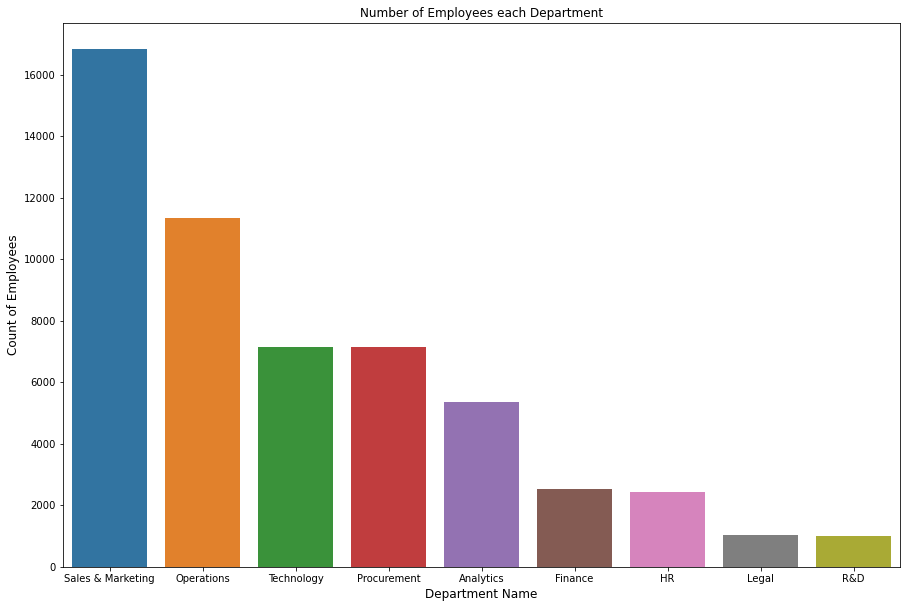

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(train['department'].value_counts().keys().tolist(), train['department'].value_counts().tolist())
plt.xlabel('Department Name', fontsize=12)
plt.ylabel('Count of Employees', fontsize=12)
plt.title("Number of Employees each Department")
plt.show()

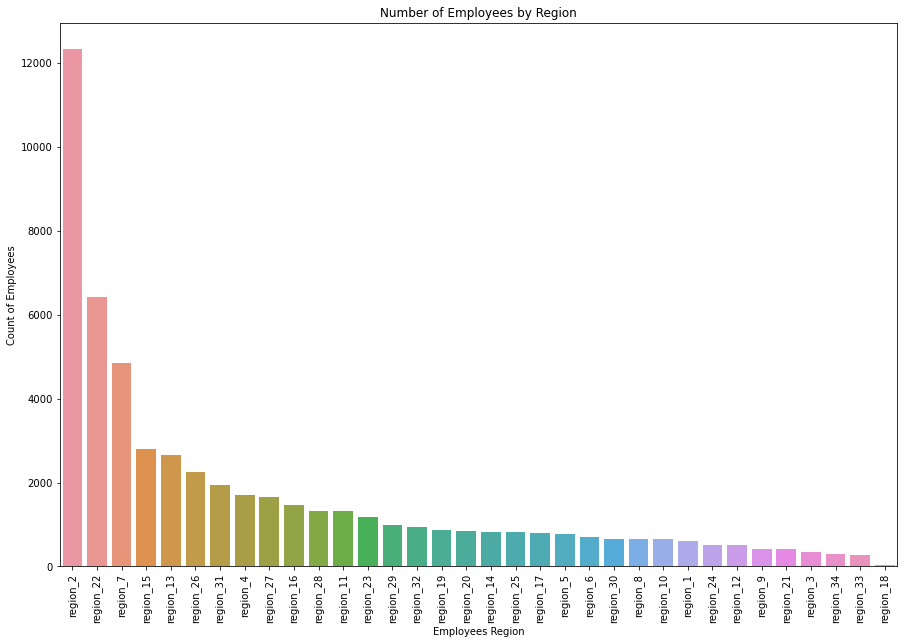

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(train['region'].value_counts().keys().tolist(), train['region'].value_counts().tolist())
plt.title('Number of Employees by Region')
plt.xlabel("Employees Region")
plt.ylabel("Count of Employees")
plt.xticks(rotation=90)
plt.show()

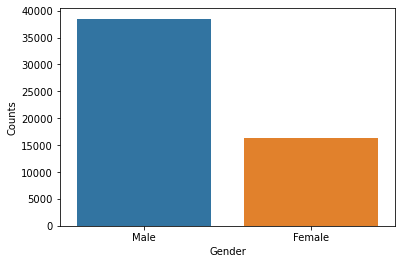

In [16]:
sns.barplot(train['gender'].value_counts().keys().tolist(), train['gender'].value_counts().tolist())
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.xticks([0,1],['Male','Female'])
plt.show()

In [17]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

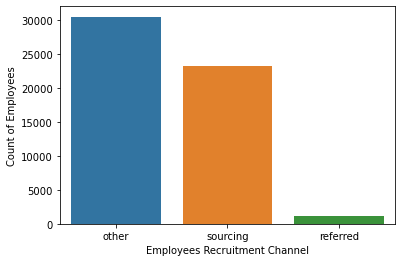

In [18]:
sns.barplot(train['recruitment_channel'].value_counts().keys().tolist(), train['recruitment_channel'].value_counts().tolist())
plt.xlabel('Employees Recruitment Channel')
plt.ylabel('Count of Employees')
plt.show()

#### Fixing the missing values:

In [19]:
train['education'].isna().sum()

2409

In [20]:
train['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [21]:
train['previous_year_rating'].isna().sum()

4124

In [22]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [23]:
# Filling the 'education' column with its mode:
train['education'].fillna(train['education'].mode()[0], inplace=True)

In [24]:
train['education'].isna().sum()

0

In [25]:
# Filling the 'previous_year_rating' by its mean:
train['previous_year_rating'].fillna(round(train['previous_year_rating'].mean(),2), inplace=True)

In [26]:
train['previous_year_rating'].isna().sum()

0

In [27]:
# Density plots for continuous variables:

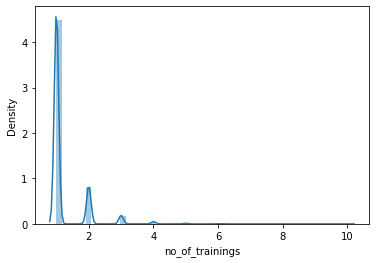

In [28]:
# Employees having no_of_training:
sns.distplot(train['no_of_trainings'])
plt.show()

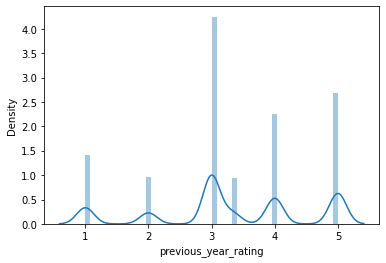

In [29]:
# Density plot of previous year_rating:
sns.distplot(train['previous_year_rating'])
plt.show()

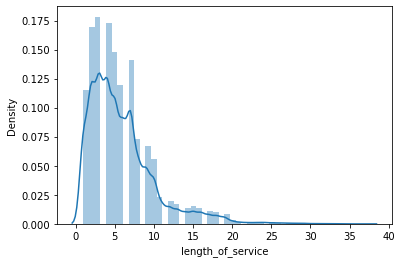

In [30]:
# Length of Services:
sns.distplot(train['length_of_service'])
plt.show()

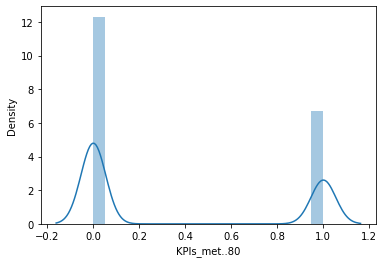

In [31]:
sns.distplot(train['KPIs_met..80'])
plt.show()

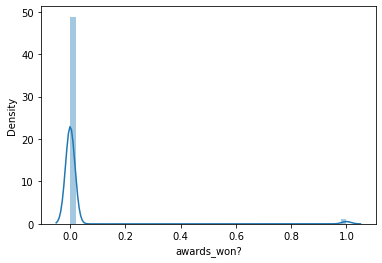

In [32]:
sns.distplot(train['awards_won?'])
plt.show()

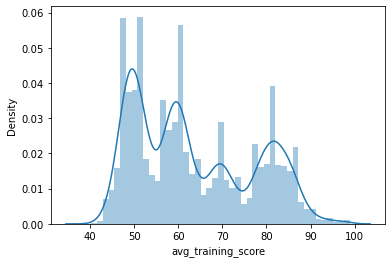

In [33]:
sns.distplot(train['avg_training_score'])
plt.show()

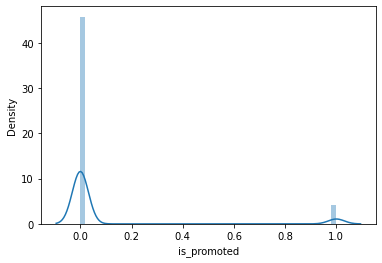

In [34]:
sns.distplot(train['is_promoted'])
plt.show()

#### Data Preprocessing:

In [35]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [36]:
# education
train['education']= le.fit_transform(train['education'])

In [37]:
# gender
train['gender']= le.fit_transform(train['gender'])

In [38]:
# recruitment_channel
train['recruitment_channel']= le.fit_transform(train['recruitment_channel'])

In [39]:
# Here we will perform One Hot Encoding of these two features department & region:

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
ohe= OneHotEncoder()

In [42]:
train.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,0,1,2,1,34,3.0,7,0,0,50,0


In [43]:
#o_h_e= pd.DataFrame(ohe.fit_transform(train[['department','region']]).toarray())

In [44]:
one_hot_encoded= pd.get_dummies(train, columns=['department','region'])

In [45]:
one_hot_encoded.head()           

,employee_id,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80,awards_won?,...,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
0,65438,2,0,2,1,35,5.0,8,1,0,...,0,0,0,0,0,0,0,1,0,0
1,65141,0,1,0,1,30,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7513,0,1,2,1,34,3.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2542,0,1,0,2,39,1.0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48945,0,1,0,1,45,3.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
one_hot_encoded.shape

(54808, 55)

In [47]:
# Final df
final_df= one_hot_encoded.drop(columns=['employee_id'], axis=1)

In [48]:
final_df.head()

,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80,awards_won?,avg_training_score,...,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
0,2,0,2,1,35,5.0,8,1,0,49,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,1,30,5.0,4,0,0,60,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2,1,34,3.0,7,0,0,50,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,39,1.0,10,0,0,50,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,45,3.0,2,0,0,73,...,0,0,0,0,0,0,0,0,0,0


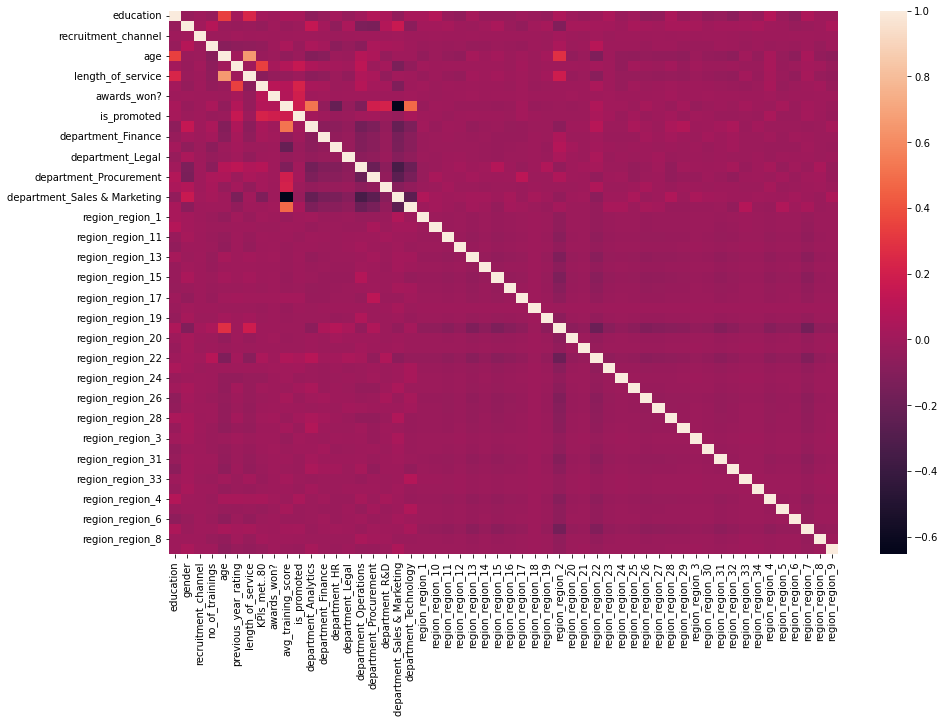

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(final_df.corr())
plt.show()

In [50]:
# Dealing with Multicollinearity
# None of the features have correlation of more than 75%.

In [51]:
final_df['is_promoted']= final_df['is_promoted'].map({0:'No',1:'Yes'})

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x= final_df.drop(['is_promoted'],axis=1)

In [54]:
y= final_df['is_promoted']

In [55]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [57]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_pred= rf.predict(x_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [60]:
print('Classification Report:\n\n',classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

          No       0.94      1.00      0.97     10041
         Yes       0.86      0.31      0.45       921

    accuracy                           0.94     10962
   macro avg       0.90      0.65      0.71     10962
weighted avg       0.93      0.94      0.92     10962



In [61]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.9374201787994891


In [62]:
print('Confusion Matrix\n\n',confusion_matrix(y_test,y_pred))

Confusion Matrix

 [[9994   47]
 [ 639  282]]


In [63]:
# Without using One Hot Encoder, we also get 93.49% of accuracy:

In [64]:
train['department']= le.fit_transform(train['department'])

In [65]:
train['region']= le.fit_transform(train['region'])

In [66]:
train.drop(columns=['employee_id'], axis=1, inplace=True)

In [67]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [68]:
train['is_promoted']= train['is_promoted'].map({0:'No',1:'Yes'})

In [69]:
x=train.drop(columns=['is_promoted'],axis=1)

In [70]:
y= train['is_promoted']

In [71]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [72]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y_pred= rf.predict(x_test)

In [74]:
print('Classification Report:\n\n',classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

          No       0.94      0.99      0.97     10041
         Yes       0.83      0.28      0.42       921

    accuracy                           0.93     10962
   macro avg       0.88      0.64      0.69     10962
weighted avg       0.93      0.93      0.92     10962



In [75]:
print('Accuracy Score', accuracy_score(y_test,y_pred))

Accuracy Score 0.9348659003831418


In [ ]:
# After performing MinMax Scaler we get accuracy score of  93.50% 

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [77]:
x=train.drop(columns=['is_promoted'],axis=1)

In [78]:
y= train['is_promoted']

In [81]:
df_scaled = scaler.fit_transform(x.to_numpy())

In [84]:
df_scaled= pd.DataFrame(df_scaled, columns=['department','region','education','gender','recruitment_channel','no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met..80','awards_won?','avg_training_score'])

In [85]:
df_scaled.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80,awards_won?,avg_training_score
0,0.875,0.939394,1.0,0.0,1.0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667
1,0.500,0.424242,0.0,1.0,0.0,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000
2,0.875,0.303030,0.0,1.0,1.0,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333
3,0.875,0.454545,0.0,1.0,0.0,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333
4,1.000,0.545455,0.0,1.0,0.0,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667


In [87]:
x_train,x_test,y_train,y_test= train_test_split(df_scaled, y, test_size=0.2, random_state=0)

In [88]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [89]:
y_pred= rf.predict(x_test)

In [91]:
print('Classification Report:\n\n', classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

          No       0.94      0.99      0.97     10041
         Yes       0.83      0.28      0.42       921

    accuracy                           0.94     10962
   macro avg       0.89      0.64      0.69     10962
weighted avg       0.93      0.94      0.92     10962



In [92]:
print('Accuracy Score:', accuracy_score(y_test,y_pred))

Accuracy Score: 0.9350483488414523
